<a href="https://colab.research.google.com/github/cychen116/ExploratoryDataAnalysis_practice/blob/main/01_EDA_practice_FEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FEC Dataset

Federal Eelection Commision Dataset
- https://www.fec.gov/

*** Things to do ***

1. Spelunk through 2020 individual contribution data
2. Find political contribution campaigns by companies --- mass numbers of donations coming from employees of same company with a 2-week timespan; select a few companies
3. Who donates first, executives or employees?
4. Find congressional districts of employees -- find external data
5. Do donations trend with local area or against?
6. Do a linear regression on likelihood of donating (R) or (D) if your boss has donated to the same party

Find executives from CO, do a party balance -1 to 1 .... Do employees have the same party balance in donations?

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data_dir = ("/content/drive/MyDrive/Colab Notebooks/EMSE 6574_c/Data/FEC dataset")
!ls "/content/drive/MyDrive/Colab Notebooks/EMSE 6574_c/Data/FEC dataset"

ccl20.zip	     indiv20.zip
ccl_header_file.csv  indiv_header_file.csv
cm20.zip	     oppexp20.zip
cm_header_file.csv   pas220.zip
cn20.zip	     pas2_header_file.csv
cn_header_file.csv   us-zip-code-latitude-and-longitude.json


In [5]:
## Indivisual Contribution Files ##
from zipfile import ZipFile
timelist = [
 '20200131_20200219',
 '20200220_20200305',
 '20200306_20200330',
 '20200331_20200426'
 ]
# '20200427_20200516',
# '20200517_20200603',
# '20200603_20200617',
# '20200618_20200629',
# '20200630_20300630'
# '20000616_20190425',
# '20190426_20190629',
# '20190630_20190810',
# '20190811_20190915',
# '20190916_20191013',
# '20191014_20191109',
# '20191110_20191205',
# '20191206_20191229',
# '20191230_20200130',
#RAM is not enough~~

print('=====INDIVIDUAL CONTRIBUTIONS=====')
print(f'Loading in indiv20 header file...', end = '')
headers = pd.read_csv(f'{data_dir}/indiv_header_file.csv')
print('done!')

individual_contribs = pd.DataFrame()
for timeframe in timelist:
    print(f'Loading in {timeframe} TXT file...', end = '')
    with ZipFile(f'{data_dir}/indiv20.zip') as zfile:
        timeframe_df = pd.read_csv(
            zfile.open(f'by_date/itcont_2020_{timeframe}.txt'),
            sep = '|',
            names = headers.columns
        )

        individual_contribs = individual_contribs.append(
            timeframe_df, ignore_index = True
        )

        del timeframe_df
    print('done!')


=====INDIVIDUAL CONTRIBUTIONS=====
Loading in indiv20 header file...done!
Loading in 20200131_20200219 TXT file...

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


done!
Loading in 20200220_20200305 TXT file...

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


done!
Loading in 20200306_20200330 TXT file...done!
Loading in 20200331_20200426 TXT file...done!


In [6]:
print('=====COMMITTEE INFO=====')
print('Loading in cm20 header file...', end = '')
headers = pd.read_csv(f'{data_dir}/cm_header_file.csv')
print('done!')

print('Loading in committee TXT file...', end = '')
with ZipFile(f'{data_dir}/cm20.zip') as zfile:
    committees = pd.read_csv(
        zfile.open('cm.txt'),
        sep = '|',
        names = headers.columns
    )
print('done!')

=====COMMITTEE INFO=====
Loading in cm20 header file...done!
Loading in committee TXT file...done!


# Data Wrangling
data organize

In [9]:
individual_contribs.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00414425,N,M2,P,202001319184120935,15,IND,"BUDGE, PASCAL",FT WORTH,TX,76244.0,IAP WORLDWIDE SERVICES INC,VP FEDERAL PROGRAMS,1312020,272,NaN,SA11AI.9128,1376592,NaN,NaN,4022020201693382913
1,C00414425,N,M2,P,202001319184120935,15,IND,"ENGLEFRIED, TRACY",MILLERSVILLE,MD,21108.0,IAP WORLDWIDE SERVICES,VP CORP BUSINESS DEVELOPMENT,1312020,212,NaN,SA11AI.9129,1376592,NaN,NaN,4022020201693382914
2,C00161414,N,M2,P,202002039186352092,15,IND,"BARTLETT, MALCOLM",BIRMINGHAM,AL,35213.0,PROTECTIVE LIFE INSURANCE COMPANY,VP CORPORATE ACCOUNTING,1312020,208,NaN,B003150S000003L11A1,1380324,NaN,NaN,4022220201693868123
3,C00161414,N,M2,P,202002039186352093,15,IND,"BIELEN, RICHARD",BIRMINGHAM,AL,35223.0,PROTECTIVE LIFE CORPORATION,PRESIDENT & COO,1312020,531,NaN,B003150S000004L11A1,1380324,NaN,NaN,4022220201693868125
4,C00161414,N,M2,P,202002039186352093,15,IND,"CALLAWAY, STEVE",BIRMINGHAM,AL,35205.0,PROTECTIVE LIFE CORPORATION,"SENIOR ASSOCIATE COUNSEL, SVP",1312020,108,NaN,B003150S000011L11A1,1380324,NaN,NaN,4022220201693868127


In [11]:
#Check on the date col
individual_contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744202 entries, 0 to 7744201
Data columns (total 21 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   CMTE_ID          object
 1   AMNDT_IND        object
 2   RPT_TP           object
 3   TRANSACTION_PGI  object
 4   IMAGE_NUM        int64 
 5   TRANSACTION_TP   object
 6   ENTITY_TP        object
 7   NAME             object
 8   CITY             object
 9   STATE            object
 10  ZIP_CODE         object
 11  EMPLOYER         object
 12  OCCUPATION       object
 13  TRANSACTION_DT   int64 
 14  TRANSACTION_AMT  int64 
 15  OTHER_ID         object
 16  TRAN_ID          object
 17  FILE_NUM         int64 
 18  MEMO_CD          object
 19  MEMO_TEXT        object
 20  SUB_ID           int64 
dtypes: int64(5), object(16)
memory usage: 1.2+ GB


In [16]:
#convert the float into date form and sort it
individual_contribs["TRANSACTION_DT"] = pd.to_datetime(individual_contribs["TRANSACTION_DT"], format = "%m%d%Y" )
print(individual_contribs["TRANSACTION_DT"].dtypes)
individual_contribs.sort_values(by = "TRANSACTION_DT").head()


datetime64[ns]


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00414425,N,M2,P,202001319184120935,15,IND,"BUDGE, PASCAL",FT WORTH,TX,76244.0,IAP WORLDWIDE SERVICES INC,VP FEDERAL PROGRAMS,2020-01-31,272,NaN,SA11AI.9128,1376592,NaN,NaN,4022020201693382913
935969,C00693234,N,M2,P2020,202002209187153471,15E,IND,"SIMMONS, GIGI",CRAWFORDVILLE,FL,323278014,NONE,NOT EMPLOYED,2020-01-31,25,C00401224,5792756,1385191,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030420201701418002
935968,C00693234,N,M2,P2020,202002209187151019,15E,IND,"SCHAEFER, JOHN",MUSKEGON,MI,494411037,NONE,NOT EMPLOYED,2020-01-31,10,C00401224,5792439,1385191,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030420201701410646
935967,C00693234,N,M2,P2020,202002209187149552,15E,IND,"ROUNDY, PAUL",SANTA ANA,CA,927052680,TUSD,TEACHER,2020-01-31,25,C00401224,5804806,1385191,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030420201701406247
935966,C00693234,N,M2,P2020,202002209187153958,15E,IND,"SMALL, ADAM",CHEYENNE,WY,820014094,ANB BANK,SERVER ADMINISTRATOR,2020-01-31,10,C00401224,5801613,1385191,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030420201701419464


In [14]:
# Set row display options to show more than default
pd.set_option('display.min_rows', 30)

# First group by name and employer to get unique names and employers
indiv_contrib_grp_1 = individual_contribs.groupby(['NAME', 'EMPLOYER'])['TRAN_ID'].count()

# Reset index to get back "NAME" and "EMPLOYER" columns
indiv_contrib_grp_1 = indiv_contrib_grp_1.reset_index()

# Then group by employer to see how many people made a transaction in each employer
indiv_contrib_grp_1.groupby('EMPLOYER')['NAME'].nunique().sort_values(ascending = False)


EMPLOYER
NOT EMPLOYED                       199662
RETIRED                            186513
NONE                                67452
SELF-EMPLOYED                       58066
SELF EMPLOYED                       46180
SELF                                40917
HOMEMAKER                            4076
NOT-EMPLOYED                         2664
EY                                   2393
ELECTRICIANS LOCAL 98                2273
HONEYWELL INTERNATIONAL              2140
ENTREPRENEUR                         2079
PRICEWATERHOUSECOOPERS, LLP          1814
GOOGLE                               1788
FEDERAL AVIATION ADMINISTRATION      1680
                                    ...  
GREENWAY HERBAL PRODUCTS, LLC           1
GREENWAY LOGISTICS                      1
GREENWAY LOGISTICS INC                  1
GREENWAY LOGISTICS, INC.                1
GREENWAY ORTHODONTICS                   1
GREENWAY PLANTS                         1
GREENWAY PRODUCTS & SERVICES            1
GREENWAY TECHNOLOGIES INC

# **2 Week Donation Pattern for Company**

In [15]:
# Let's check on the big Tech companies that we are familier with, such as Apple, Amazon, Google, Facebook,and Micorsoft

apple_indiv_contribs = individual_contribs[individual_contribs["EMPLOYER"] == "APPLE"].sort_values(by = "TRANSACTION_DT")
amazon_indiv_contribs = individual_contribs[individual_contribs["EMPLOYER"] == "AMAZON"].sort_values(by = "TRANSACTION_DT")
google_indiv_contribs = individual_contribs[individual_contribs["EMPLOYER"] == "GOOGLE"].sort_values(by = "TRANSACTION_DT")
facebook_indiv_contribs = individual_contribs[individual_contribs["EMPLOYER"] == "FACEBOOK"].sort_values(by = "TRANSACTION_DT")
microsoft_indiv_contribs = individual_contribs[individual_contribs["EMPLOYER"] == "MICROSOFT"].sort_values(by = "TRANSACTION_DT")

Apple

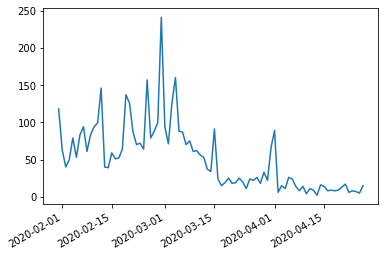

In [ ]:
# The whole time pattern form the data 
apple_indiv_contribs["TRANSACTION_DT"].value_counts().plot()

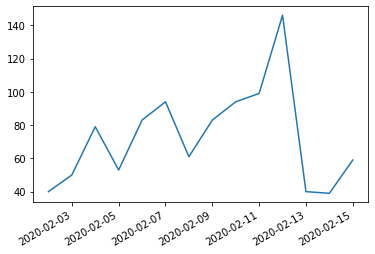

In [ ]:
# The 2 weeks time pattern form the data within 2020-02-01:2020-02:15
apple_indiv_contribs[(apple_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (apple_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()

Amazon

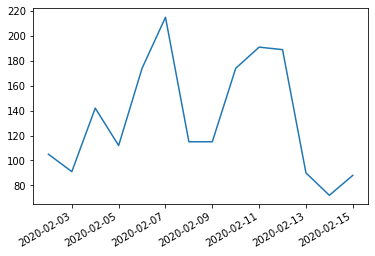

In [ ]:
# The 2 weeks time pattern form the data within 2020-02-01:2020-02:15
amazon_indiv_contribs[(amazon_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (amazon_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()

Google

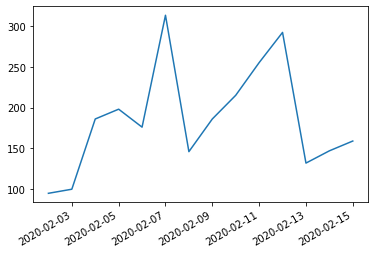

In [ ]:
# The 2 weeks time pattern form the data within 2020-02-01:2020-02:15
google_indiv_contribs[(google_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (google_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()

Facebook

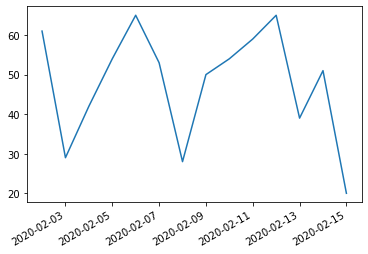

In [ ]:
# The 2 weeks time pattern form the data within 2020-02-01:2020-02:15
facebook_indiv_contribs[(facebook_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (facebook_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()

Microsoft

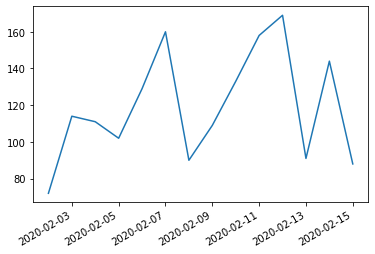

In [ ]:
# The 2 weeks time pattern form the data within 2020-02-01:2020-02:15
microsoft_indiv_contribs[(microsoft_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (microsoft_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()

Compare the whole time pattern among Apple, Amazon, Google, Facebook, and Microsoft

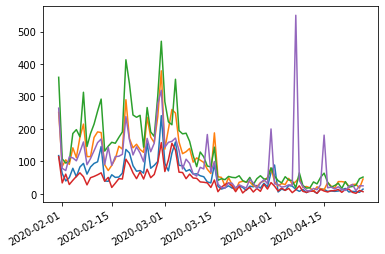

In [ ]:
apple_indiv_contribs["TRANSACTION_DT"].value_counts().plot()
amazon_indiv_contribs["TRANSACTION_DT"].value_counts().plot()
google_indiv_contribs["TRANSACTION_DT"].value_counts().plot()
facebook_indiv_contribs["TRANSACTION_DT"].value_counts().plot()
microsoft_indiv_contribs["TRANSACTION_DT"].value_counts().plot()

Compare the 2 weeks time pattern among Apple, Amazon, Google, Facebook, and Micorsoft

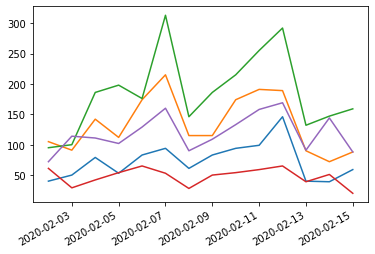

In [ ]:
apple_indiv_contribs[(apple_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (apple_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()
amazon_indiv_contribs[(amazon_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (amazon_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()
google_indiv_contribs[(google_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (google_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()
facebook_indiv_contribs[(facebook_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (facebook_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()
microsoft_indiv_contribs[(microsoft_indiv_contribs["TRANSACTION_DT"] > "2020-02-01") & (microsoft_indiv_contribs["TRANSACTION_DT"] <= "2020-02-15")]["TRANSACTION_DT"].value_counts().plot()

# **Who Donates First, Executives or Employees?**

## Plot Function

In [60]:
def find_contributors(company_name): #THIS FUNCTION IS TO HAVE AN IDEA OF THE CONTRIBUTIONS AMONG DIFERENT OCCUPATIONS. 
  company= individual_contribs[individual_contribs['EMPLOYER']== company_name]
  company_graph= company.loc[:,'OCCUPATION'].value_counts().plot(kind='bar', figsize=(30,10))
  plt.yscale('log')
  stats= company['TRANSACTION_AMT'].describe()  
  return company_graph,stats

In [43]:
def find_executive(company_name): #THIS FUNCTION IS TO HAVE AN IDEA OF THE CONTRIBUTIONS AMONG EXECUTIVE OR NOT. 
  company = individual_contribs[individual_contribs['EMPLOYER']== company_name]
  isExecutive = company[company["OCCUPATION"].str.contains("EXECUTIVE") ==1]
  isNotExecutive = company[company["OCCUPATION"].str.contains("EXECUTIVE") ==0]
  isCEO = company[company["OCCUPATION"].str.contains("CEO") ==1]
  ## Plot
  fig = plt.figure(figsize =(12,6))
  x1 = isExecutive["TRANSACTION_DT"]
  y1 = isExecutive["TRANSACTION_AMT"]
  x2 = isNotExecutive["TRANSACTION_DT"]
  y2 = isNotExecutive["TRANSACTION_AMT"]
  x3 = isCEO["TRANSACTION_DT"]
  y3 = isCEO["TRANSACTION_AMT"]
  
  employee = plt.scatter(x2,y2,c="c", alpha=0.3, label="individaul_contribs")
  executive = plt.scatter(x1,y1,c="r", alpha=0.6, label="individaul_contribs")
  ceo = plt.scatter(x3,y3,c="gold", alpha=1.0, label="individaul_contribs")

  plt.legend((employee,executive,ceo),("Employee","Executive","CEO"),scatterpoints=1, markerscale=0.4)
  plt.xlabel('Transaction Date (yyyy-mm-dd)')
  plt.ylabel('Transaction Amount(US dollars)')
  plt.title(f"{company_name}Individual Contributions", fontsize = 15)

  plt.show()


## Apple

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4849dfb690>,
 count     4509.000000
 mean       121.051231
 std        425.627165
 min      -2800.000000
 25%         10.000000
 50%         27.000000
 75%         75.000000
 max      10000.000000
 Name: TRANSACTION_AMT, dtype: float64)

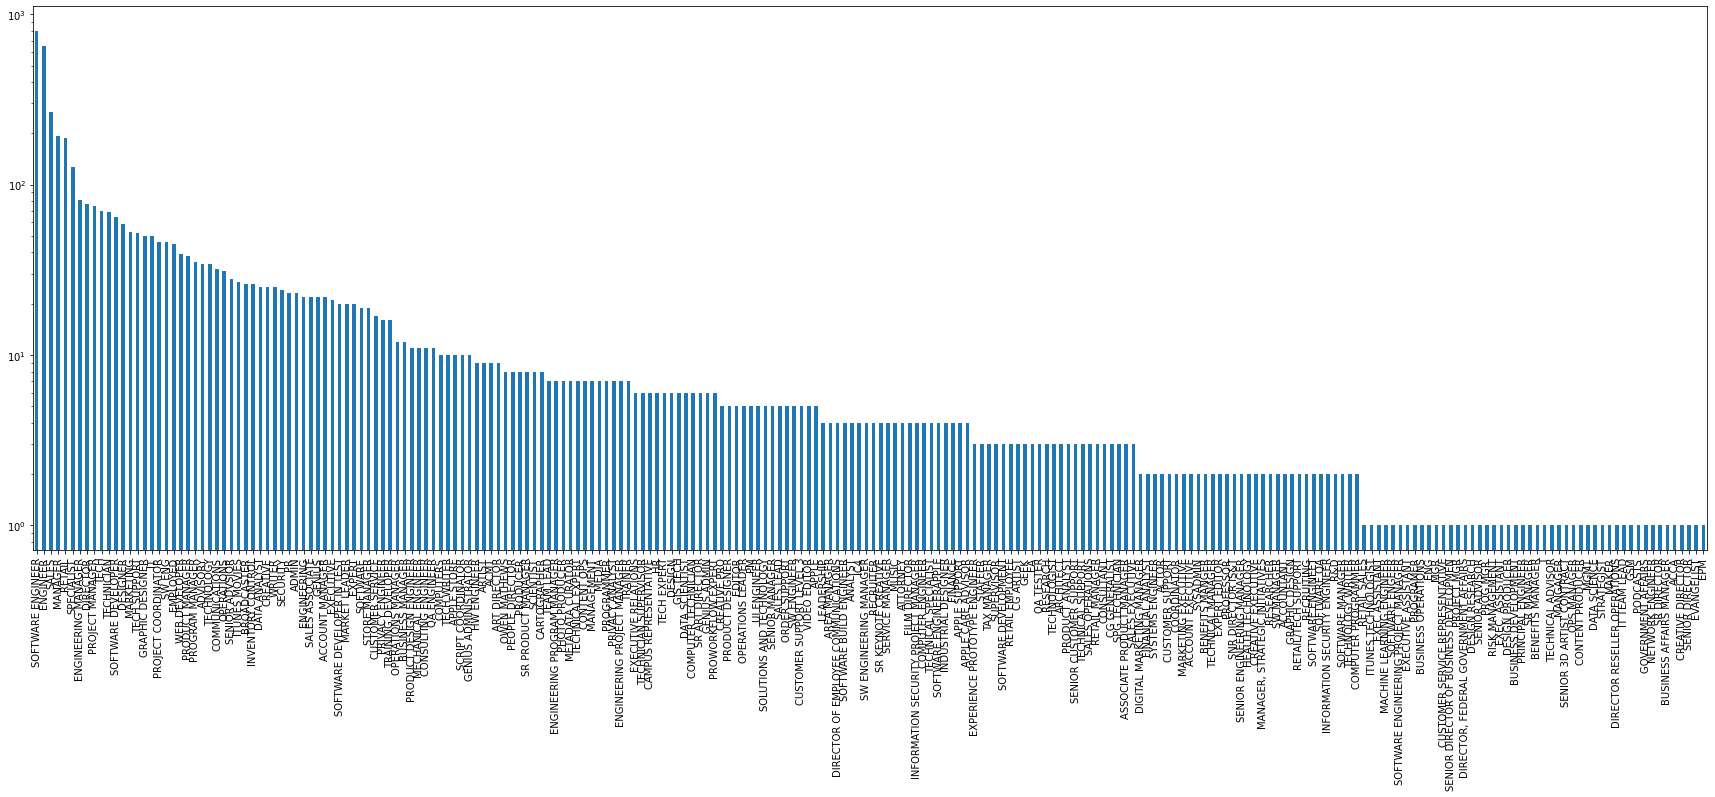

In [35]:
find_contributors("APPLE")

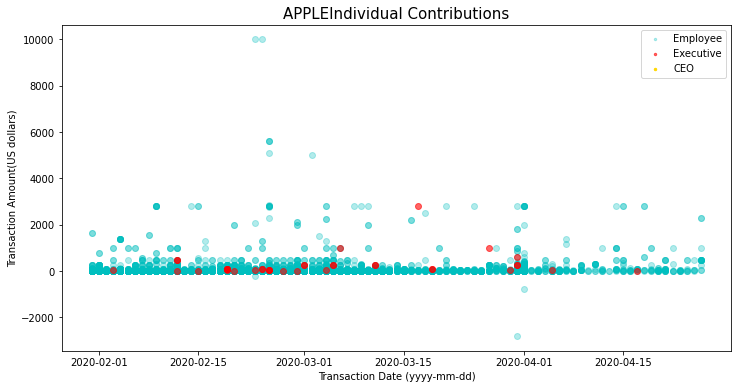

In [44]:
find_executive("APPLE")

## Amazon

(<matplotlib.axes._subplots.AxesSubplot at 0x7f484a6a7410>,
 count     8314.000000
 mean        78.775078
 std        267.122368
 min       -185.000000
 25%         10.000000
 50%         27.000000
 75%         50.000000
 max      10000.000000
 Name: TRANSACTION_AMT, dtype: float64)

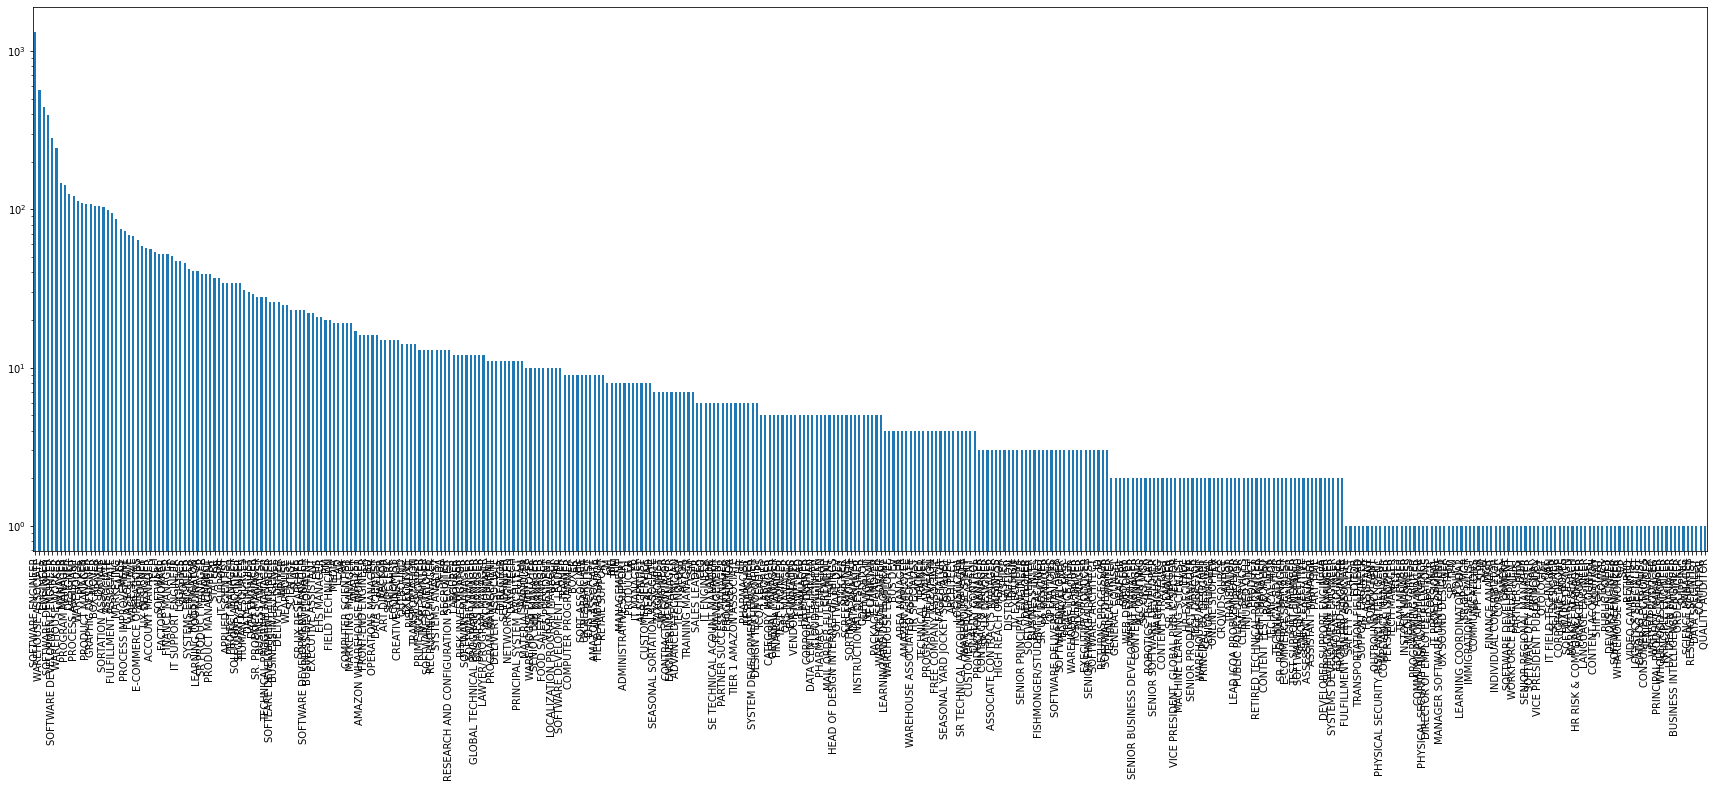

In [45]:
find_contributors("AMAZON")

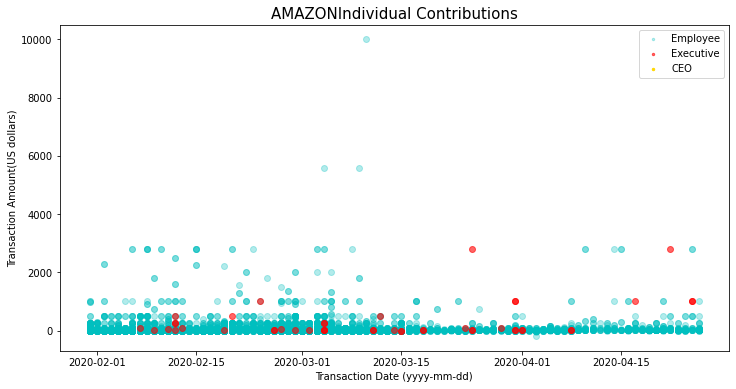

In [46]:
find_executive("AMAZON")

## Google

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4848182f50>,
 count    10884.000000
 mean       193.654263
 std        670.201471
 min      -5000.000000
 25%         25.000000
 50%         50.000000
 75%        100.000000
 max      35500.000000
 Name: TRANSACTION_AMT, dtype: float64)

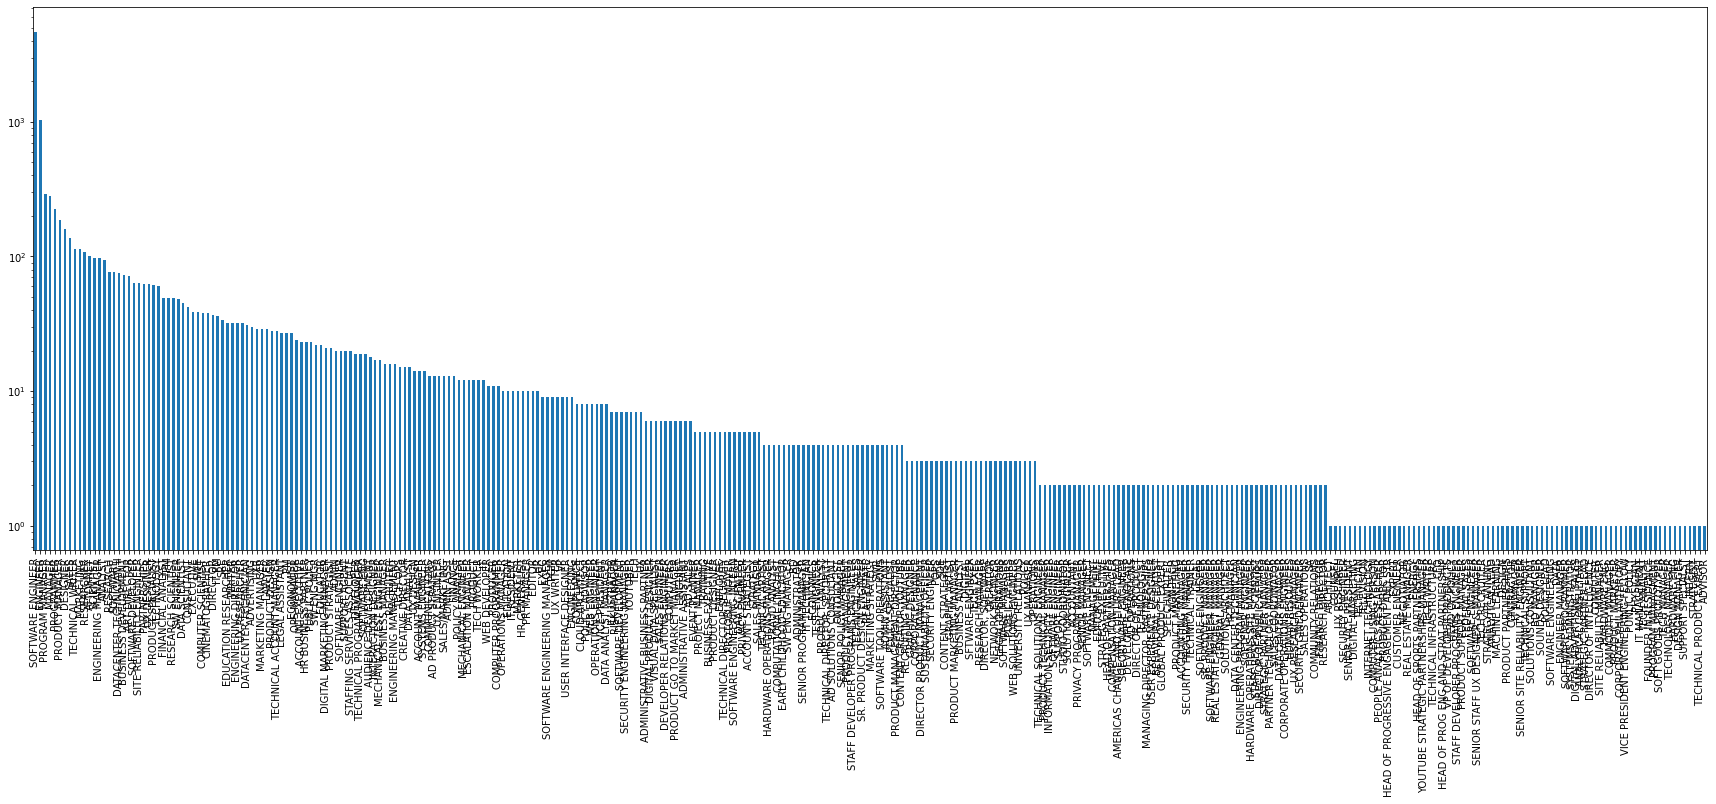

In [47]:
find_contributors("GOOGLE")

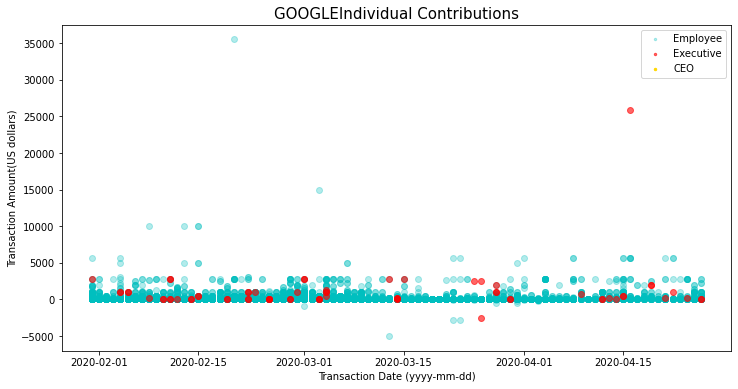

In [48]:
find_executive("GOOGLE")

## Facebook

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4847b50790>,
 count      3349.000000
 mean        367.625560
 std        1995.147203
 min       -2800.000000
 25%          20.000000
 50%          50.000000
 75%         200.000000
 max      100000.000000
 Name: TRANSACTION_AMT, dtype: float64)

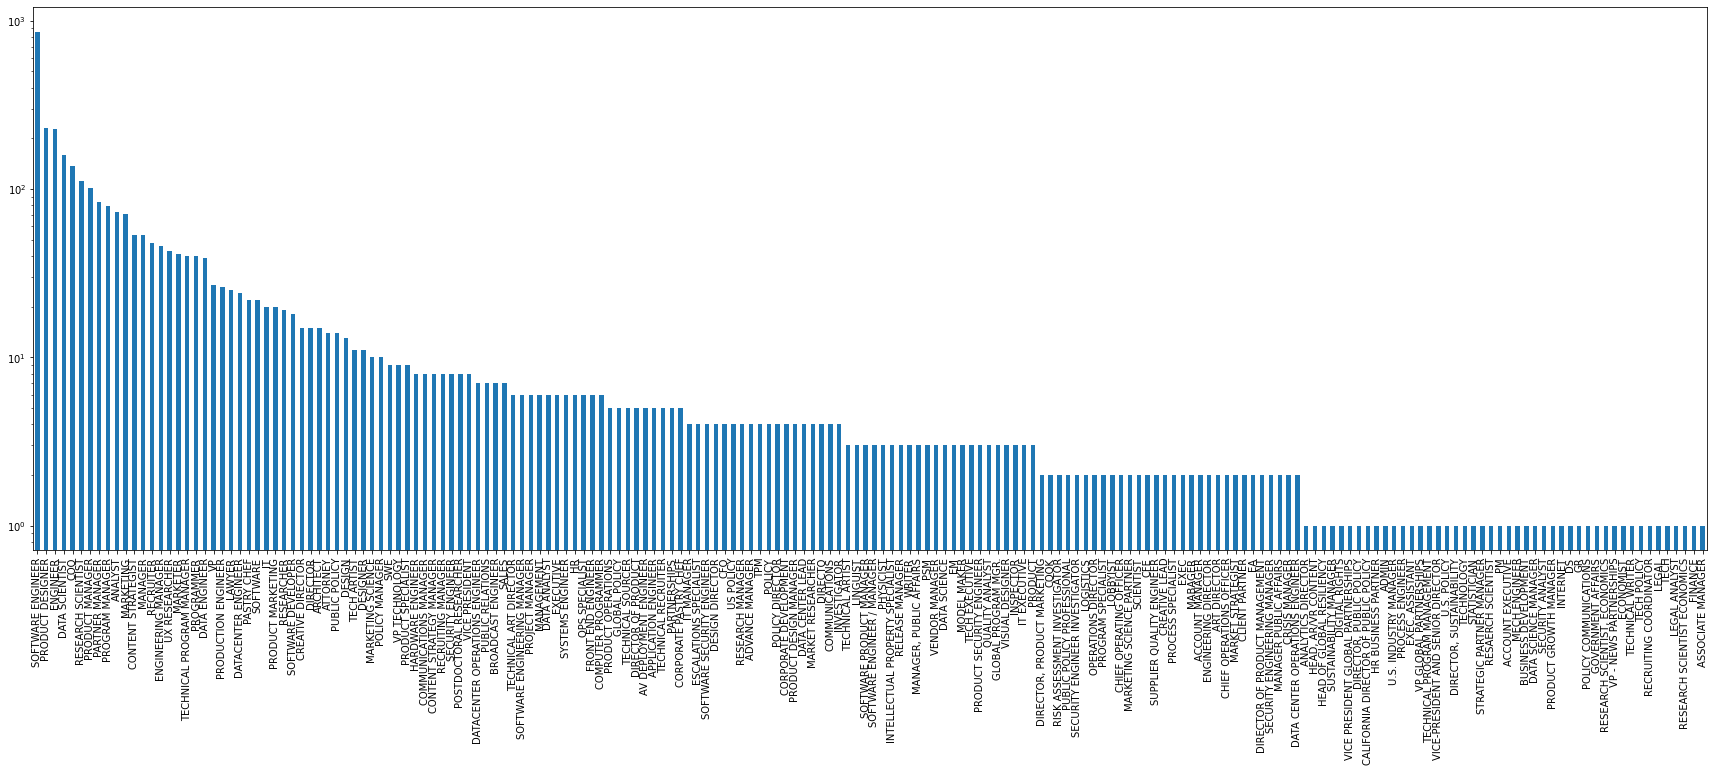

In [49]:
find_contributors("FACEBOOK")

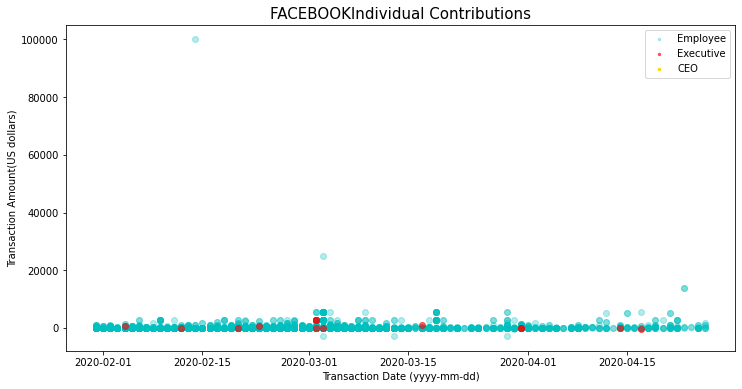

In [50]:
find_executive("FACEBOOK")

## Microsoft

(<matplotlib.axes._subplots.AxesSubplot at 0x7f48468552d0>,
 count     7863.000000
 mean       124.706219
 std        396.219579
 min      -2800.000000
 25%         10.000000
 50%         28.000000
 75%        100.000000
 max      10000.000000
 Name: TRANSACTION_AMT, dtype: float64)

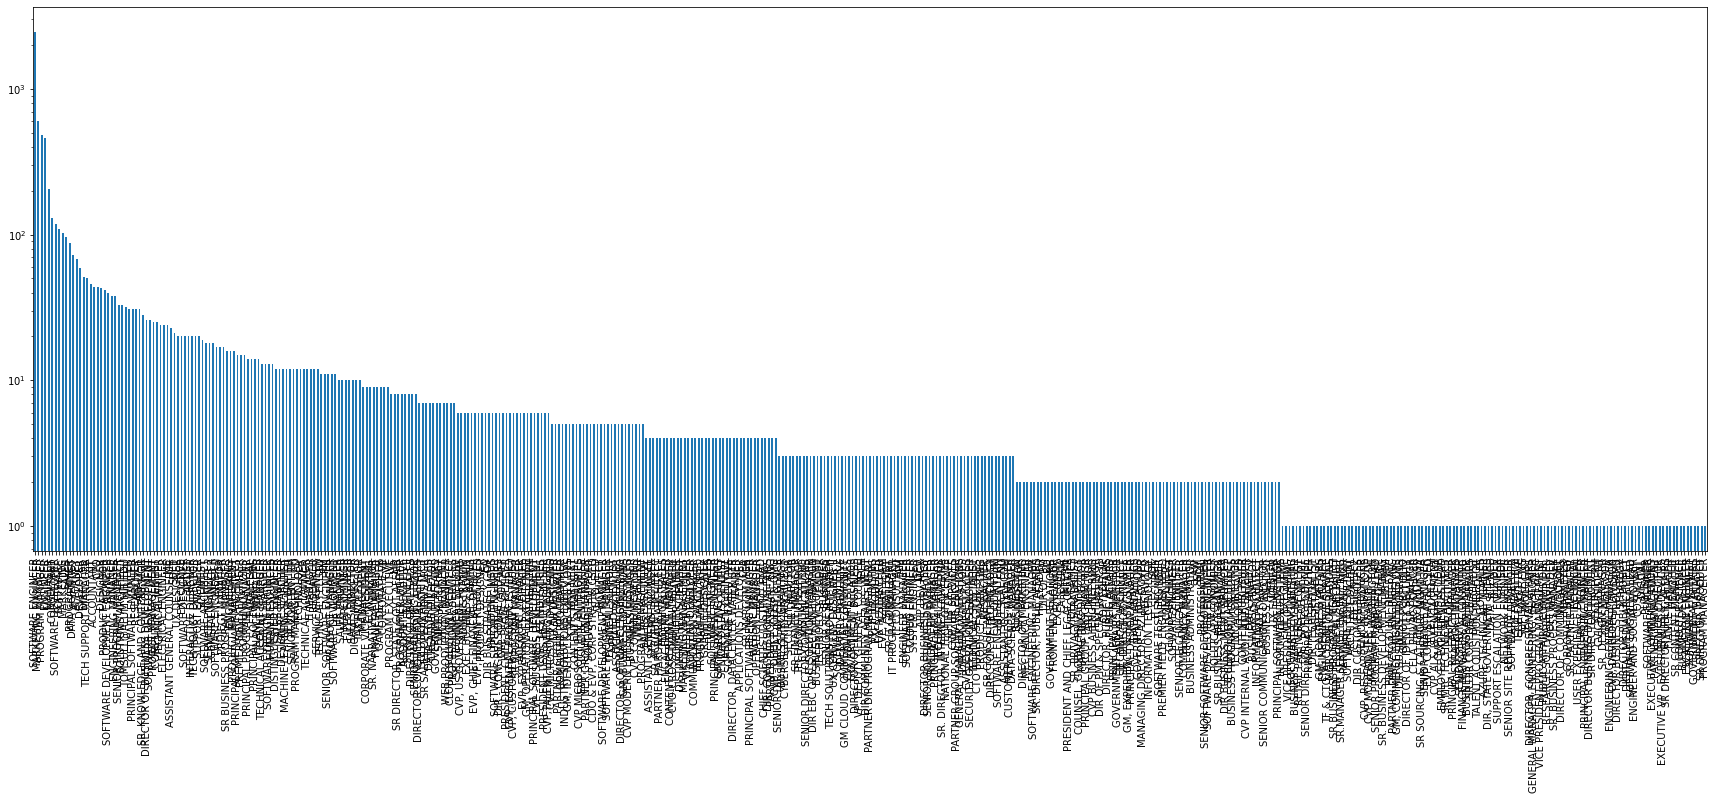

In [55]:
find_contributors("MICROSOFT")

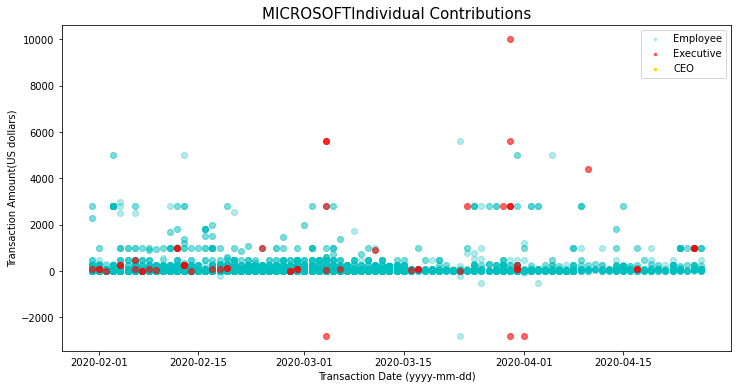

In [53]:
find_executive("MICROSOFT")

From the scatter figures of the individual contributions by time, there is no obvious pattern that executives donate earlier than employees among Apple, Amazon, Google, Facebook, and Microsoft.

# **Find Congressional Districts of Employees**



**Do Donations Trend With Local Area or Against?**

Due to the company that I dig in is mostly based in CA, I will use the zip code in CA as example.

https://projects.fivethirtyeight.com/republicans-democrats-cities/

https://www.isidewith.com/map/dAW/support-for-my-political-beliefs#z5

https://s3-us-west-1.amazonaws.com/ut-webassets/html/elections/sd-me-i-zip-voters.html

http://politicalmaps.org/

In [17]:
apple_indiv_contribs = apple_indiv_contribs.merge(committees[["CMTE_ID","CMTE_NM","CMTE_PTY_AFFILIATION"]], on = "CMTE_ID")
apple_indiv_contribs.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CMTE_PTY_AFFILIATION
0,C00659938,N,M2,P2020,202002209187192398,15E,IND,"HENG, HARRY",LONG BEACH,CA,908148512,APPLE,RETAIL,2020-01-31,5,C00401224,1719637,1385241,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702171870,FRIENDS OF ANDREW YANG,DEM
1,C00659938,N,M2,P2020,202002209187193741,15E,IND,"HSU, JUI-SHAN GRACE",SAN FRANCISCO,CA,941094318,APPLE,PROGRAM MANAGER,2020-01-31,100,C00401224,1705683,1385241,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702175899,FRIENDS OF ANDREW YANG,DEM
2,C00659938,N,M2,P2020,202002209187199176,15E,IND,"LEE, JOHNNY",SAN GABRIEL,CA,917763571,APPLE,ENGINEERING MANAGER,2020-01-31,100,C00401224,1699475,1385241,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702192203,FRIENDS OF ANDREW YANG,DEM
3,C00659938,N,M2,P2020,202002209187202320,15E,IND,"MALOCH, GRAYSON",SAN ANTONIO,TX,782494205,APPLE,CUSTOMER SERVICE,2020-01-31,100,C00401224,1715116,1385241,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702201635,FRIENDS OF ANDREW YANG,DEM
4,C00659938,N,M2,P2020,202002209187180646,15,IND,"BUYZE, EVAN",SANTA CLARA,CA,950511146,APPLE,PRODUCT MANAGER,2020-01-31,80,NaN,1748564,1385241,NaN,NaN,4030520201702136613,FRIENDS OF ANDREW YANG,DEM


In [20]:
#apple_indiv_contribs.info()
pd.set_option('display.min_rows', 10)
apple_zip = apple_indiv_contribs.groupby(["ZIP_CODE"])["CMTE_PTY_AFFILIATION"].value_counts().to_frame(name = "Counts").reset_index()
display(apple_zip)

,ZIP_CODE,CMTE_PTY_AFFILIATION,Counts
0,0,DEM,1
1,10011.0,DEM,6
2,10589.0,DEM,3
3,11787,DEM,30
4,32950.0,DEM,1
...,...,...,...
819,98012,DEM,1
820,980272675,DEM,1
821,980921534,DEM,2
822,981041585,DEM,6


In [21]:
# Focus on California to see that whether the political trend in the company match the local political trend
# The California Zip Code List : https://www.zipcodestogo.com/California/
apple_zip_CA = pd.DataFrame()
for i in range(90001, 96162):
  df = apple_zip[apple_zip["ZIP_CODE"].str.startswith(str(i)) ==1]
  apple_zip_CA = apple_zip_CA.append(df, ignore_index=True)    
print("done")

done


In [22]:
display(apple_zip_CA)

apple_CA_DEM = apple_zip_CA[apple_zip_CA["CMTE_PTY_AFFILIATION"] == "DEM"]["Counts"].sum()
apple_CA_REP = apple_zip_CA[apple_zip_CA["CMTE_PTY_AFFILIATION"] == "REP"]["Counts"].sum()

print("There are", apple_CA_DEM, "individual donation to Democrates Party from Apple's employee that is located in CA.")
print("There are", apple_CA_REP, "individual donation to Republican Party from Apple's employee that is located in CA.")

,ZIP_CODE,CMTE_PTY_AFFILIATION,Counts
0,900124446,DEM,2
1,900192825,DEM,1
2,900453755,DEM,1
3,900484244,DEM,3
4,900643336,DEM,3
...,...,...,...
183,951588577,DEM,2
184,956184423,DEM,1
185,957585671,DEM,2
186,958181857,DEM,3


There are 409 individual donation to Democrates Party from Apple's employee that is located in CA.
There are 4 individual donation to Republican Party from Apple's employee that is located in CA.


 Californians lean Democratic from many reports. And there is a significant result that Apple's employee, whoever is located in CA, made more donations to the Democrats Party. For this case, the donation trend match with the local.

## MODEL


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np


In [24]:
apple_indiv_contribs = apple_indiv_contribs.fillna("")
a_ic_Executive = apple_indiv_contribs[apple_indiv_contribs["OCCUPATION"].str.contains("EXECUTIVE") ==1]
a_ic_notExecutive = apple_indiv_contribs[apple_indiv_contribs["OCCUPATION"].str.contains("EXECUTIVE") == 0]
a_ic_ceo = apple_indiv_contribs[apple_indiv_contribs["OCCUPATION"].str.contains("CEO") == 1]
a_ic_Executive["CMTE_PTY_AFFILIATION"].value_counts()

# The Executive in Apple donate to Democrates or other, but Republican.
# Therefore, I suppose if employee doesn't donate to Democrates is against their boss.

DEM    27
       10
Name: CMTE_PTY_AFFILIATION, dtype: int64

In [25]:
apple_indiv_contribs["Boss_Political_leanings"] = np.where(apple_indiv_contribs['CMTE_PTY_AFFILIATION'] == 'DEM', 1, 0)
apple_indiv_contribs.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CMTE_PTY_AFFILIATION,Boss_Political_leanings
0,C00659938,N,M2,P2020,202002209187192398,15E,IND,"HENG, HARRY",LONG BEACH,CA,908148512,APPLE,RETAIL,2020-01-31,5,C00401224,1719637,1385241,,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702171870,FRIENDS OF ANDREW YANG,DEM,1
1,C00659938,N,M2,P2020,202002209187193741,15E,IND,"HSU, JUI-SHAN GRACE",SAN FRANCISCO,CA,941094318,APPLE,PROGRAM MANAGER,2020-01-31,100,C00401224,1705683,1385241,,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702175899,FRIENDS OF ANDREW YANG,DEM,1
2,C00659938,N,M2,P2020,202002209187199176,15E,IND,"LEE, JOHNNY",SAN GABRIEL,CA,917763571,APPLE,ENGINEERING MANAGER,2020-01-31,100,C00401224,1699475,1385241,,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702192203,FRIENDS OF ANDREW YANG,DEM,1
3,C00659938,N,M2,P2020,202002209187202320,15E,IND,"MALOCH, GRAYSON",SAN ANTONIO,TX,782494205,APPLE,CUSTOMER SERVICE,2020-01-31,100,C00401224,1715116,1385241,,* EARMARKED CONTRIBUTION: SEE BELOW,4030520201702201635,FRIENDS OF ANDREW YANG,DEM,1
4,C00659938,N,M2,P2020,202002209187180646,15,IND,"BUYZE, EVAN",SANTA CLARA,CA,950511146,APPLE,PRODUCT MANAGER,2020-01-31,80,,1748564,1385241,,,4030520201702136613,FRIENDS OF ANDREW YANG,DEM,1


In [26]:
one_hot_encoder = OneHotEncoder(sparse = False)
x = one_hot_encoder.fit_transform(apple_indiv_contribs['CMTE_PTY_AFFILIATION'].values.reshape(-1, 1))
y = apple_indiv_contribs["Boss_Political_leanings"]
regr = LinearRegression()
regr.fit(x, y)
regr.coef_

array([0.00172706, 1.00172706, 0.00172706, 0.00172706, 0.00172706])

In [29]:
# Let's see what the model predicts when we pass in features.
# Features should be in the form of an array of five binary
# indicators: [DEM, DFL, LIB, NNE, REP, UNK]. A 1 in a particular
# location indicates the contribution was for a committee of that party.
# e.g., [1, 0, 0, 0, 0] means the contribution was made to a DEM committee.
# The result should be close to 1 if it matches and close to 0 if it doesn't.

regr.predict([[1, 0, 0, 0, 0]])

array([-9.04224612e-17])

In [57]:
pip install benfordslaw

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=2c63792f842e9533de83e3d3b7cab591dcc09208d810ae0c6008ef969edad3d4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=3341.29


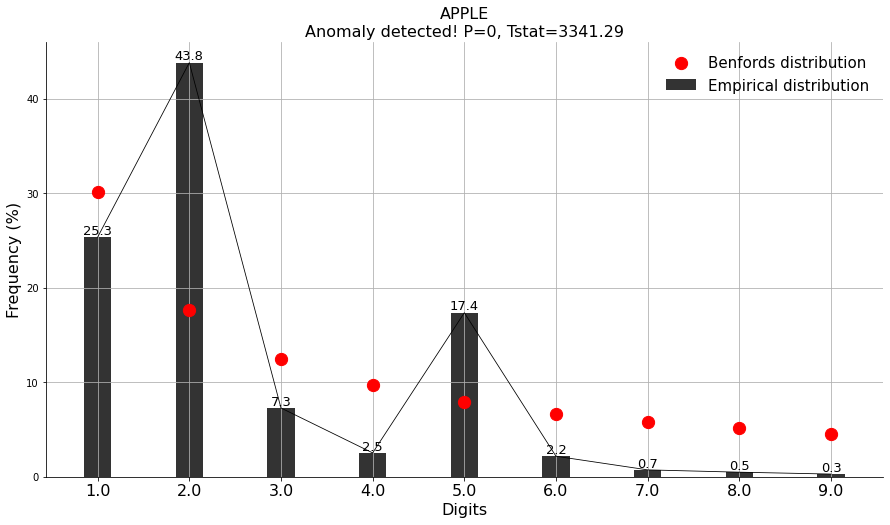

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f48457404d0>)

In [59]:
###taken from : https://github.com/erdogant/benfordslaw

from benfordslaw import benfordslaw
# Initialize
bl = benfordslaw(alpha=0.5)

# Extract election information.
X = individual_contribs['TRANSACTION_AMT'].loc[individual_contribs['EMPLOYER']=='APPLE'].values

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='APPLE')

In [75]:
# Pull the executives from CO
co_execs = individual_contribs[
    (individual_contribs['STATE'] == 'CA')
    & (individual_contribs['OCCUPATION'].str.lower().str.contains('executive'))
].merge(committees[['CMTE_ID', 'CMTE_NM', 'CMTE_PTY_AFFILIATION']], on = 'CMTE_ID')

# Create a "score" for each contribution: 1 for DEM, -1 for REP, 0 for all others
co_execs['contrib_score'] = np.where(
    co_execs['CMTE_PTY_AFFILIATION'] == 'DEM', 1, 
    np.where(co_execs['CMTE_PTY_AFFILIATION'] == 'REP', -1, 0)
)

# Calculate the party balance by summing over the `contrib_score` column
# and dividing by the number of transactions
def party_score(rows):
    return rows.sum() / rows.shape[0]

co_execs_scores = co_execs.groupby('NAME')['contrib_score'].agg(party_score)

In [76]:
# Pull the employees from CO
co_emps = individual_contribs[
    (individual_contribs['STATE'] == 'CO')
    & ~(individual_contribs['OCCUPATION'].str.lower().str.contains('executive', na = False))
].merge(committees[['CMTE_ID', 'CMTE_NM', 'CMTE_PTY_AFFILIATION']], on = 'CMTE_ID')

# Create a "score" for each contribution: 1 for DEM, -1 for REP, 0 for all others
co_emps['contrib_score'] = np.where(
    co_emps['CMTE_PTY_AFFILIATION'] == 'DEM', 1, 
    np.where(co_emps['CMTE_PTY_AFFILIATION'] == 'REP', -1, 0)
)

# Calculate the party balance by summing over the `contrib_score` column
# and dividing by the number of transactions
def party_score(rows):
    return rows.sum() / rows.shape[0]

co_emps_scores = co_emps.groupby('NAME')['contrib_score'].agg(party_score)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


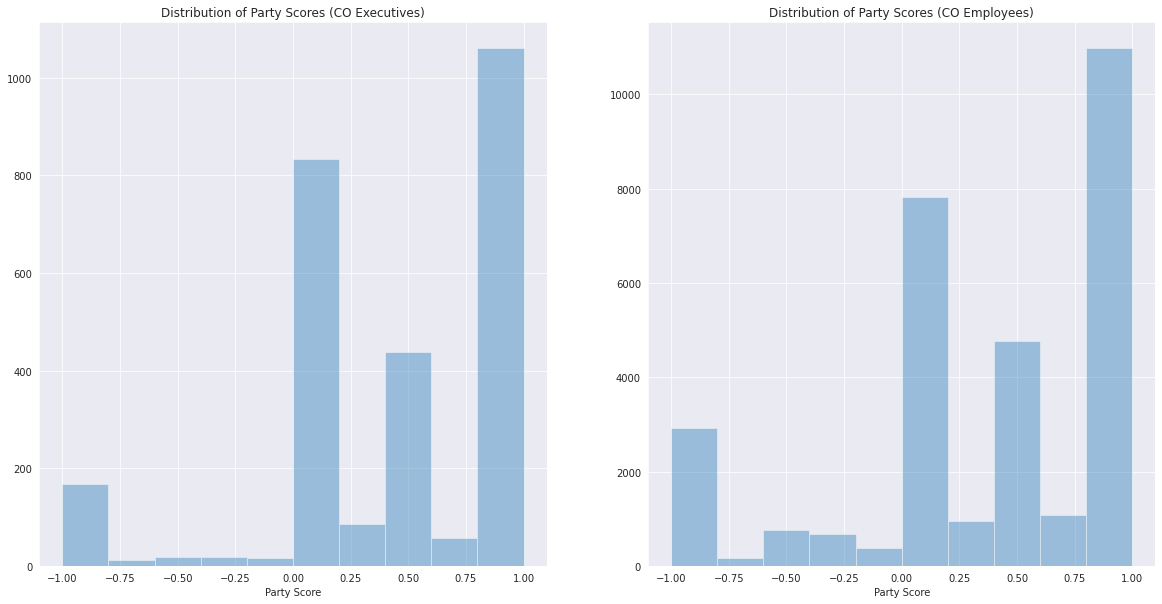

In [77]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
sns.distplot(co_execs_scores, bins = 10, kde = False, ax = axs[0]);
axs[0].set_title('Distribution of Party Scores (CO Executives)');
axs[0].set_xlabel('Party Score');

sns.distplot(co_emps_scores, bins = 10, kde = False, ax = axs[1]);
axs[1].set_title('Distribution of Party Scores (CO Employees)');
axs[1].set_xlabel('Party Score');

From the Result we can see that in California, people's political leans are more close to DEM